# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing all the necessary libraries and the MNSIT dataset from Keras.

* MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.callbacks import ModelCheckpoint 

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Printing the shape of the input data and Displaying the First image using MATPLOTLIB



(60000, 28, 28)


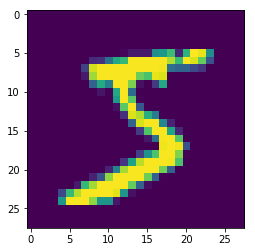

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set



In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Image Normalization

In [9]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

Statistics train=0.131 (0.308), test=0.133 (0.310)
Data Generator mean=0.131, std=0.308


In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Added regularizer(L2) and ReLu after Normalization

In [11]:
 model = Sequential()

 
model.add(Conv2D(24, (3, 3), kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3), kernel_regularizer=regularizers.l2(0.01))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.01))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D()) # 11
model.add(Conv2D(10, (1, 1), kernel_regularizer=regularizers.l2(0.01))) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(12, (3, 3), kernel_regularizer=regularizers.l2(0.01))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.01))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Conv2D(10, 1, kernel_regularizer=regularizers.l2(0.01))) #7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 24)        240       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 24)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 12)        2604      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 12)        0         
__________

# Adding ModelCheckpoint for saving the model with highest Validation Accuracy

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max',save_weights_only=False)
callbacks_list = [checkpoint]

In [14]:
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)


model.fit_generator(train_iterator, validation_data=test_iterator, validation_steps=len(X_test)/64, steps_per_epoch=len(X_train)/64, callbacks=callbacks_list, epochs=40)


Instructions for updating:
Use tf.cast instead.
Epoch 1/40
938/937 [==============================] - 19s 21ms/step - loss: 0.3712 - acc: 0.9427 - val_loss: 0.1820 - val_acc: 0.9674

Epoch 00001: val_acc improved from -inf to 0.96740, saving model to weights-improvement-01-0.97.hdf5
Epoch 2/40
938/937 [==============================] - 14s 15ms/step - loss: 0.1661 - acc: 0.9713 - val_loss: 0.2692 - val_acc: 0.9387

Epoch 00002: val_acc did not improve from 0.96740
Epoch 3/40
938/937 [==============================] - 14s 15ms/step - loss: 0.1568 - acc: 0.9726 - val_loss: 0.3087 - val_acc: 0.9281

Epoch 00003: val_acc did not improve from 0.96740
Epoch 4/40
938/937 [==============================] - 14s 15ms/step - loss: 0.1493 - acc: 0.9744 - val_loss: 0.3477 - val_acc: 0.9109

Epoch 00004: val_acc did not improve from 0.96740
Epoch 5/40
938/937 [==============================] - 14s 15ms/step - loss: 0.1443 - acc: 0.9751 - val_loss: 0.1600 - val_acc: 0.9693

Epoch 00005: val_acc impro

# Loading the model from the saved checkpoint.



In [0]:
from keras.models import load_model
modelPath = 'weights-improvement-35-0.99.hdf5'
model = load_model(modelPath)

score = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)

Printing the model performance Score



In [16]:
print(score)

[0.09077096511721611, 0.9873]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.61673253e-08 1.49690538e-06 3.63003521e-04 2.67333700e-04
  2.20569607e-09 2.08301046e-07 9.81673307e-14 9.99065578e-01
  2.53125236e-08 3.02326720e-04]
 [3.30544516e-08 7.53478089e-04 9.99219775e-01 2.30636701e-08
  4.96606090e-10 3.77179177e-08 2.65401140e-05 1.27238678e-10
  1.24290565e-07 1.96638868e-11]
 [1.15877400e-13 9.99950171e-01 5.14195654e-06 4.51006400e-07
  1.54418601e-07 2.19625945e-05 1.25521140e-08 2.00633385e-05
  2.01049693e-06 5.39642713e-08]
 [9.99741018e-01 1.59211616e-10 8.83179894e-07 2.77027937e-07
  1.06152527e-06 7.66470475e-06 1.86032223e-04 1.57929776e-07
  5.84649115e-06 5.70192824e-05]
 [1.83135217e-06 3.74563297e-10 1.19541866e-07 5.04806899e-08
  9.99667168e-01 5.57750525e-07 3.55874035e-05 1.73396638e-05
  2.73343812e-05 2.49939767e-04]
 [9.23465514e-13 9.99934077e-01 5.59968976e-06 2.35340380e-07
  3.74197498e-07 4.05574610e-06 1.19837225e-08 4.87499929e-05
  6.84764018e-06 8.00683964e-08]
 [3.32192910e-12 3.31004867e-06 9.75369403e-07 2.12456328e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# 25 Misclassified Images from Validation Dataset

Total false predictions:  401 out of 10000


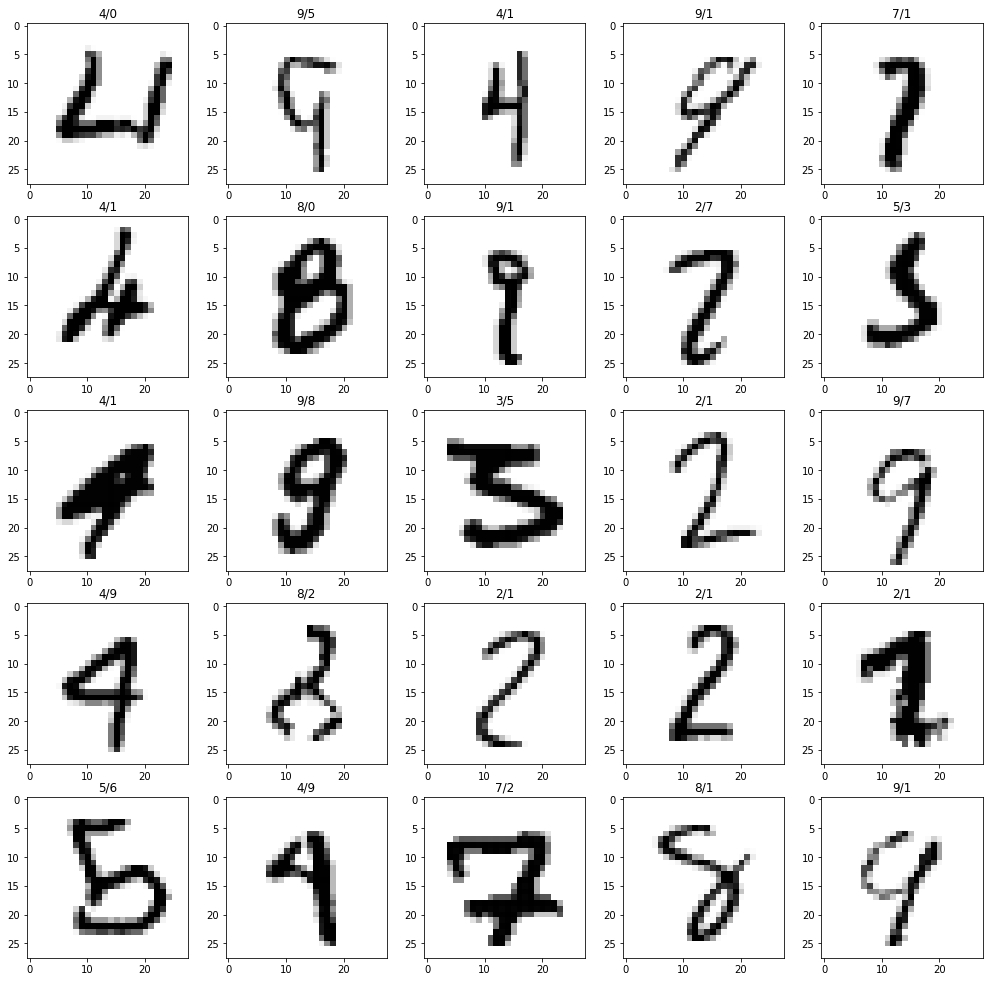

In [28]:
import matplotlib.cm as cm

# convert one-hot encodings into labels
def one_hot_to_dense(labels_one_hot):
    return np.argmax(labels_one_hot,1)
 
y_pred = model.predict(X_test)


valid_pred_label = one_hot_to_dense(y_pred)
valid_label = one_hot_to_dense(Y_test)
false_index = []

for i in range(valid_label.shape[0]):
    if valid_pred_label[i] != valid_label[i]:
        false_index.append(i)

print('Total false predictions: ', len(false_index),'out of', len(Y_test))

plt.figure(figsize=(35, 35))

for i in range(0,5):
    for j in range(0,5):
        if i*10+j<len(false_index):
            plt.subplot(10,10,i*10+j+1)
            plt.title('%d/%d'%(valid_label[false_index[i*10+j]],
                               valid_pred_label[false_index[i*10+j]]))
            plt.imshow(X_test[false_index[i*10+j]].reshape(28,28),cmap=cm.binary)